In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import datacleaning
import itertools
from nltk.probability import FreqDist
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
def do_centrality(G: nx.Graph):
    deg = pd.DataFrame(nx.degree_centrality(G).items(), columns=['Id', 'degree_centrality'])
    eig = pd.DataFrame(nx.eigenvector_centrality_numpy(G, weight="Weight").items(), columns=['Id', 'eigenvector_centrality'])
    merged = pd.merge(deg, eig, on = "Id")
    return merged

data = pd.read_csv("data_small.csv")
data = data.rename(columns={"Unnamed: 0":"Id"})

In [3]:
instruction_graph = nx.read_gexf("recipe_instruction_small.gexf")
ingredient_graph = nx.read_gexf("recipe_ingredient_small.gexf")

In [4]:

instruction_graph_CCs = nx.connected_components(instruction_graph)

instruction_graph_CCs_subgraphs = [instruction_graph.subgraph(c).copy() for c in instruction_graph_CCs]


lens = [len(g) for g in instruction_graph_CCs_subgraphs]
s, count = np.unique(np.sort(lens), return_counts=True)
print(s)


instruction_graph_CCs = sorted(nx.connected_components(instruction_graph), key=len, reverse=True)

instruction_graph_largest_CC = instruction_graph.subgraph(instruction_graph_CCs[0])

[   1    2    3 4799]


In [5]:
ingredient_graph_CCs = nx.connected_components(ingredient_graph)

ingredient_graph_CCs_subgraphs = [ingredient_graph.subgraph(c).copy() for c in ingredient_graph_CCs]


lens = [len(g) for g in ingredient_graph_CCs_subgraphs]
s, count = np.unique(np.sort(lens), return_counts=True)
print(s)


ingredient_graph_CCs = sorted(nx.connected_components(ingredient_graph), key=len, reverse=True)

ingredient_graph_largest_CC = ingredient_graph.subgraph(ingredient_graph_CCs[0])

[   1    2    3 4794]


In [6]:
data_instruction_centralities = pd.merge(do_centrality(instruction_graph_largest_CC), data)
data_ingredient_centralities = pd.merge(do_centrality(ingredient_graph_largest_CC), data)


In [7]:
data_instruction_centralities.sort_values(by = "degree_centrality", ascending=False)

,Id,degree_centrality,eigenvector_centrality,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
1075,Bp8g2s3Ki0yxGkT8XFNPc.BKJt/KbVO,0.208420,5.477561e-02,Creamy Chicken and Broccoli Casserole,"1 (16 ounce) package rotini pasta, uncooked AD...",Bring a large pot of lightly salted water to a...,yhqUiCk.TUdAsKBmH.wfGqYrgvpplbW,ounce package rotini pasta uncooked tables...,bring a large pot of lightly salted water to a...,bring a large pot of lightly salted water a bo...,"['package', 'rotini', 'pasta', 'uncooked', 'bu...","['bring', 'large', 'pot', 'lightly', 'salted',...",Bp8g2s3Ki0yxGkT8XFNPc.BKJt/KbVO
4775,c/xFWXxvrZTrx0nun8d7yOvpOfEsG1C,0.206128,5.232706e-02,Codfish with Cream,12 ounces dried salted cod fish ADVERTISEMENT ...,Soak the dried salted cod in cold water with t...,7aczzt4nchxDxG7niRasyb5HP1rPVse,ounces dried salted cod fish vegetable oil f...,soak the dried salted cod in cold water with t...,soak the in cold water with the skin side up h...,"['ounces', 'dried', 'salted', 'cod', 'fish', '...","['soak', 'cold', 'water', 'skin', 'side', 'hou...",c/xFWXxvrZTrx0nun8d7yOvpOfEsG1C
1732,MQ1JOZdg6V9mhQoId99kdWC8mpjkE8u,0.202376,5.103326e-02,Jambalaya with Fresh Fruit,3 tablespoons all-purpose flour ADVERTISEMENT ...,Preheat oven to 400 degrees F (200 degrees C)....,kdz6RN2B9RP87fmSE.Ro8YMgQhxIBZK,tablespoons allpurpose flour tablespoons ol...,preheat oven to degrees f degrees c lightly ...,preheat oven to degrees f degrees c lightly gr...,"['allpurpose', 'flour', 'olive', 'oil', 'packa...","['preheat', 'oven', 'degrees', 'degrees', 'lig...",MQ1JOZdg6V9mhQoId99kdWC8mpjkE8u
4717,O.HBaJ9715/EEl2S.uvHFpj5Hug3jsq,0.201542,5.468268e-02,Jota (Bean and Sauerkraut Soup),10 ounces dried cranberry beans ADVERTISEMENT ...,Place the cranberry beans into a large contain...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,ounces dried cranberry beans pound pork sho...,place the cranberry beans into a large contain...,place the into a large container cover with se...,"['ounces', 'dried', 'cranberry', 'beans', 'por...","['place', 'large', 'container', 'cover', 'seve...",O.HBaJ9715/EEl2S.uvHFpj5Hug3jsq
525,dkMm6nFCGoDjuLCqx.unhfXwFn/hEbG,0.200917,5.329405e-02,Flavorful Beef Stir-Fry,2 cups brown rice ADVERTISEMENT 4 cups water A...,Bring brown rice and water to a boil in a sauc...,u35OPvkfadficZgJOx5oM95Zam/QoRG,cups brown rice cups water tablespoons co...,bring brown rice and water to a boil in a sauc...,bring and to a boil in a saucepan over high he...,"['brown', 'rice', 'water', 'cornstarch', 'whit...","['bring', 'boil', 'saucepan', 'high', 'heat', ...",dkMm6nFCGoDjuLCqx.unhfXwFn/hEbG
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,uPIYqKC3bAbTaYUskfA/GKK9lYpCE8e,0.000208,4.488019e-11,Bird's Nests II,2 cups chow mein noodles ADVERTISEMENT 2 cups ...,Place a sheet of waxed paper or foil on a larg...,o0RJZ/BYguuXxTt0Ft5tJhT408FuYEC,cups chow mein noodles cups crushed cornfla...,place a sheet of waxed paper or foil on a larg...,place a sheet of waxed paper or foil on a larg...,"['chow', 'mein', 'noodles', 'crushed', 'cornfl...","['place', 'sheet', 'waxed', 'paper', 'foil', '...",uPIYqKC3bAbTaYUskfA/GKK9lYpCE8e
2921,c0ym.5sWeM5MA8bWtK8vzNh.pYIppka,0.000208,5.099234e-08,Utokia's Ginger Shrimp and Broccoli with Garlic,Reynolds® Parchment Paper ADVERTISEMENT 4 cups...,Preheat oven to 400 degrees F. Tear off four 1...,YYEJjLvAGuYtKGSgMecrM.qQJwLFDiy,reynolds parchment paper cups broccoli flore...,preheat oven to degrees f tear off four inch ...,preheat oven to degrees f tear off four inch s...,"['reynolds', 'parchment', 'paper', 'broccoli',...","['preheat', 'oven', 'degrees', 'tear', 'four',...",c0ym.5sWeM5MA8bWtK8vzNh.pYIppka
781,4x4wcopKTzNV69WloOTZAb2tY3/UDoe,0.000208,9.803208e-07,Crispy Fish Fillets,1 egg ADVERTISEMENT 2 tablespoons prepared yel...,"In a shallow dish, whisk together the egg, mus...",97OPcpsSFNdvVjLmwk0OJ3xwKnCarr6,egg tablespoons prep

In [8]:
data_ingredient_centralities.sort_values(by = "degree_centrality", ascending=False)

,Id,degree_centrality,eigenvector_centrality,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
2388,UxpOTenDP2ohz10AFKIA.1XXWkwZdyK,0.136240,7.345219e-02,Mrs. Sigg's Snickerdoodles,"1/2 cup butter, softened ADVERTISEMENT 1/2 cup...",Preheat oven to 400 degrees F (200 degrees C)....,3FkBLTjVQFwQEU46DtI8/j9MROUq27e,cup butter softened cup shortening cups ...,preheat oven to degrees f degrees c cream to...,preheat oven to degrees f degrees c together t...,"['butter', 'softened', 'shortening', 'white', ...","['preheat', 'oven', 'degrees', 'degrees', 'tog...",UxpOTenDP2ohz10AFKIA.1XXWkwZdyK
3740,us79pWbQkannZMlUdpxJyhg3.hxsSeS,0.135406,7.407833e-02,Blueberry Coffee Cake I,1 cup packed brown sugar ADVERTISEMENT 2/3 cup...,Heat oven to 350 degrees F (175 degrees C). Co...,.sycaiuSlPujj5Bmezb1W3Ld0PGeV/u,cup packed brown sugar cup allpurpose flour...,heat oven to degrees f degrees c coat a bund...,heat oven to degrees f degrees c coat a bundt ...,"['packed', 'brown', 'sugar', 'allpurpose', 'fl...","['heat', 'oven', 'degrees', 'degrees', 'coat',...",us79pWbQkannZMlUdpxJyhg3.hxsSeS
140,9OMxs.iBBr1Quxb4odoRASv.cmxndGG,0.130816,7.373155e-02,Honey's Butter Cake,2 1/2 cups all-purpose flour ADVERTISEMENT 1 t...,Preheat oven to 325 degrees F (165 degrees C)....,xgPej3TZDbSJi8g9cfRYIXhaD4vrmNi,cups allpurpose flour teaspoon baking powd...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['allpurpose', 'flour', 'baking', 'powder', 'b...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",9OMxs.iBBr1Quxb4odoRASv.cmxndGG
846,YxC.rYu4FeA1tGXTjg3CiyuB0J8EbiC,0.129773,7.256171e-02,Cinnamon Hazelnut Biscotti,3/4 cup butter ADVERTISEMENT 1 cup white sugar...,Preheat oven to 350 degrees F(175 degrees C). ...,k/kC.3eVoapEYNE1Ghc56Q3hEpCi6ae,cup butter cup white sugar eggs teaspo...,preheat oven to degrees f degrees c grease a ...,preheat oven to degrees f degrees c grease a c...,"['butter', 'white', 'sugar', 'eggs', 'vanilla'...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",YxC.rYu4FeA1tGXTjg3CiyuB0J8EbiC
3102,bCWMxEQcd/ftXTA0L1bBhDhweJi.ZaO,0.126643,6.940568e-02,Country Morning Cake,1/4 cup brown sugar ADVERTISEMENT 1/4 cup whit...,Preheat oven to 350 degrees F (175 degrees C)....,cFoK6IlMnqyS2a3otENWaM7sXpTkQ/i,cup brown sugar cup white sugar teaspoon ...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['brown', 'sugar', 'white', 'sugar', 'ground',...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",bCWMxEQcd/ftXTA0L1bBhDhweJi.ZaO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,yCIopigjNLcsNftmlWfLaq/Bx27Ssba,0.000209,1.239659e-08,Navy Bean Soup II,1 (16 ounce) package dried navy beans ADVERTIS...,"Rinse beans with water. Place beans, onions, t...",y9wU5BDnjgzWIJscj/7SK383OT52vxW,ounce package dried navy beans onions chop...,rinse beans with water place beans onions toma...,rinse with water place and in large pot or dut...,"['package', 'dried', 'navy', 'beans', 'onions'...","['rinse', 'water', 'place', 'large', 'pot', 'd...",yCIopigjNLcsNftmlWfLaq/Bx27Ssba
173,IGzkjRBmdmMXInwf1IetfPDJ7Vj.8p2,0.000209,1.971011e-06,Scallops in Pastry with Lobster Sauce,1/4 cup butter ADVERTISEMENT 1 (10 ounce) lobs...,Melt the butter in a large skillet over medium...,Sr/oEjDtaxRJ8SytQU4ek5T/Uidsbl2,cup butter ounce lobster tail cup allpur...,melt the butter in a large skillet over medium...,melt the in a skillet over medium heat split t...,"['butter', 'lobster', 'tail', 'allpurpose', 'f...","['melt', 'skillet', 'medium', 'heat', 'split',...",IGzkjRBmdmMXInwf1IetfPDJ7Vj.8p2
4663,.jpUVomX2oq196k9VI5ATUIvW6h.jf.,0.000209,7.923939e-10,Firecracker Scallops,5 slices bacon ADVERTISEMENT 1 tablespoon baco...,"Cook the bacon in a large, deep skillet over m...",sHQNnvrozPCdG4B2lGnz77TnSW5YCQK,slices bacon tablespoon bacon drippings t...,cook the bacon in a la

In [9]:
d = {b:c['weight'] for a,b,c in ingredient_graph_largest_CC.edges('5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO', data=True)}
d = pd.DataFrame(pd.Series(d), columns=["weight"]).reset_index().rename(columns={"index": "Id"})
d.set_index('Id').join(data.set_index('Id')).sort_values(by = "weight", ascending=False)

,weight,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
Id,,,,,,,,,,,
MxrOg0jqhPDRA.JyUtqN7D8AzwDkP9W,0.845154,Mom's Chocolate Cake,2 cups white sugar ADVERTISEMENT 1/2 cup short...,Preheat oven to 350 degrees F (175 degrees C)....,hO5RyM05wwo57jFouPX8P.Wrzo.ZefC,cups white sugar cup shortening eggs cu...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['white', 'sugar', 'shortening', 'eggs', 'unsw...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",MxrOg0jqhPDRA.JyUtqN7D8AzwDkP9W
yDyvibYQpOrFD.gtrwqgbGNwDkCbDce,0.839146,Roll About Sugar Cookies,1 1/2 cups white sugar ADVERTISEMENT 1 cup but...,Preheat oven to 350 degrees F (180 degrees C)....,sVXF9WvdnomR1cGE2LeThOd4ytvME86,cups white sugar cup butter flavored short...,preheat oven to degrees f degrees c cream to...,preheat oven to degrees f degrees c cream toge...,"['white', 'sugar', 'butter', 'flavored', 'shor...","['preheat', 'oven', 'degrees', 'degrees', 'cre...",yDyvibYQpOrFD.gtrwqgbGNwDkCbDce
sk3cxEE/DBZYelSb0TlkNLyFUaG6IKq,0.831567,World's Best Maine Whoopie Pies - Ayuh,1/2 cup vegetable shortening ADVERTISEMENT 2 c...,Preheat oven to 375 degrees F (190 degrees C)....,f/lMZxOPx3KA0zLkiFMP4GAfsaNxqSm,cup vegetable shortening cups milk cups w...,preheat oven to degrees f degrees c cut and ...,preheat oven to degrees f degrees c cut and se...,"['vegetable', 'shortening', 'milk', 'white', '...","['preheat', 'oven', 'degrees', 'degrees', 'cut...",sk3cxEE/DBZYelSb0TlkNLyFUaG6IKq
mWFUm.rybDWXkGH8E.d3D08CpXImN16,0.819892,Happy Birthday Cake,1 cup butter ADVERTISEMENT 2 cups white sugar ...,Preheat oven to 350 degrees F (175 degrees C)....,YiaVWPnVK8DyF5.KV1DKTcbLYbqGy1W,cup butter cups white sugar teaspoon vani...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'vanilla', 'extra...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",mWFUm.rybDWXkGH8E.d3D08CpXImN16
uabxx6C.QV1EVAZqWI/1x5ovZMM59hO,0.799456,Healthier Best Brownies,1/4 cup butter ADVERTISEMENT 1/2 cup white sug...,Preheat oven to 350 degrees F (175 degrees C)....,UcIkRevtVEMosLDSDjDaDOWra01xwMi,cup butter cup white sugar eggs cup app...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'eggs', 'applesau...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",uabxx6C.QV1EVAZqWI/1x5ovZMM59hO
...,...,...,...,...,...,...,...,...,...,...,...
Na7e9MzutlpRicA6uEDi15EBiJwXw8G,0.500979,Auntie Mae's Irish Bread,3 cups all-purpose flour ADVERTISEMENT 1 1/4 c...,Preheat oven to 350 degrees F (175 degrees C)....,UN1FlJE30oUTixlRE/vItHdp7xl3sRu,cups allpurpose flour cups milk or more as...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease an ...,"['allpurpose', 'flour', 'milk', 'needed', 'rai...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",Na7e9MzutlpRicA6uEDi15EBiJwXw8G
d/8M/cJzegvVjSWVp7Q.ZVZIzRzga7e,0.500979,Great-Grandmother Steinbeck's Johnnycake (Corn...,1 cup all-purpose flour ADVERTISEMENT 1/2 cup ...,Preheat the oven to 400 degrees F (200 degrees...,z3WX3ygXyDZ94GJqp6bDFh6DkqZW.9q,cup allpurpose flour cup white cornmeal c...,preheat the oven to degrees f degrees c grea...,preheat the oven to degrees f degrees c grease...,"['allpurpose', 'flour', 'white', 'cornmeal', '...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",d/8M/cJzegvVjSWVp7Q.ZVZIzRzga7e
VQSAnONv.e9pI5uSuKnNeKyRyllFKEK,0.500979,Poppy Seed French Toast,3 tablespoons poppy seeds ADVERTISEMENT 3 eggs...,In a small mixing bowl whisk together the popp...,X/B80Mv/4YpwVN2W8wQ0XmchD5eJxWm,tablespoons poppy seeds eggs cups milk ...,in a small mixing bowl whisk together the popp...,in a small mixing bowl whisk together the and ...,"['poppy', 'seeds', 'eggs', 'milk', 'vanilla', ...","['small', 'mixing', 'bo

In [10]:
d = {b:c['weight'] for a,b,c in instruction_graph_largest_CC.edges('5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO', data=True)}
d = pd.DataFrame(pd.Series(d), columns=["weight"]).reset_index().rename(columns={"index": "Id"})
d.set_index('Id').join(data.set_index('Id')).sort_values(by = "weight", ascending=False)

,weight,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
Id,,,,,,,,,,,
WPIBK.zCMtomTe4JVnBcdFDOCfryhly,0.862304,Best Moist Chocolate Cake,1 cup margarine ADVERTISEMENT 1 3/4 cups white...,Preheat oven to 350 degrees F (175 degrees C)....,zIzjTO9ZhAoOgqLKMHeUIJPOr3L5gR.,cup margarine cups white sugar eggs t...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['margarine', 'white', 'sugar', 'eggs', 'vanil...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",WPIBK.zCMtomTe4JVnBcdFDOCfryhly
2elIkaNi3ZPdQyVRSA3/fgXvzHEy81W,0.847964,Glazed Almond Bundt Cake,"1 cup butter, softened ADVERTISEMENT 2 cups wh...",Preheat oven to 350 degrees F (175 degrees C)....,zuIkCyK92NKMkyQXZ/Ja7FYHYZvTgfO,cup butter softened cups white sugar eggs...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'softened', 'white', 'sugar', 'eggs...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",2elIkaNi3ZPdQyVRSA3/fgXvzHEy81W
rCkys6pNvJ9Vun6xGsqdET23yPe.u.O,0.832672,No Fail Pound Cake,1/2 cup butter ADVERTISEMENT 1 cup white sugar...,Preheat oven to 350 degrees F (175 degrees C)....,CP9FpFh1wBnKDaL25CnsNIuXLsQD5Cu,cup butter cup white sugar eggs teaspoo...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'eggs', 'vanilla'...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",rCkys6pNvJ9Vun6xGsqdET23yPe.u.O
EGixKQjX8nIzxFmTABcDNn50Si7qvyy,0.819533,Carrot Pineapple Cake II,2 1/2 cups all-purpose flour ADVERTISEMENT 2 t...,Preheat oven to 350 degrees F (175 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cups allpurpose flour teaspoons baking sod...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['allpurpose', 'flour', 'baking', 'soda', 'bak...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",EGixKQjX8nIzxFmTABcDNn50Si7qvyy
w0a0ema6YOZoPnLCrV/VsI50orE64Um,0.804815,Blueberry Buttermilk Coffeecake,1/2 cup butter ADVERTISEMENT 1 1/3 cups white ...,Preheat oven to 350 degrees F (175 degrees C)....,umdzOTWkbd.SfMrLmPoiWBi7OHAImPu,cup butter cups white sugar eggs teasp...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'white', 'sugar', 'eggs', 'vanilla'...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",w0a0ema6YOZoPnLCrV/VsI50orE64Um
...,...,...,...,...,...,...,...,...,...,...,...
9w2.D/ItEdrXUjTGj2F53hH7kDhn/Bq,0.502519,Pudding with Cornflakes,4 1/2 cups whole milk ADVERTISEMENT 4 1/2 cups...,Preheat oven to 350 degrees F (175 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cups whole milk cups cornflakes cereal ...,preheat oven to degrees f degrees c in a lar...,preheat oven to degrees f degrees c in a large...,"['whole', 'milk', 'cornflakes', 'cereal', 'bro...","['preheat', 'oven', 'degrees', 'degrees', 'lar...",9w2.D/ItEdrXUjTGj2F53hH7kDhn/Bq
us79pWbQkannZMlUdpxJyhg3.hxsSeS,0.502440,Blueberry Coffee Cake I,1 cup packed brown sugar ADVERTISEMENT 2/3 cup...,Heat oven to 350 degrees F (175 degrees C). Co...,.sycaiuSlPujj5Bmezb1W3Ld0PGeV/u,cup packed brown sugar cup allpurpose flour...,heat oven to degrees f degrees c coat a bund...,heat oven to degrees f degrees c coat a bundt ...,"['packed', 'brown', 'sugar', 'allpurpose', 'fl...","['heat', 'oven', 'degrees', 'degrees', 'coat',...",us79pWbQkannZMlUdpxJyhg3.hxsSeS
irMARr.cE0Ef7ds.qoNGb.7.CtpBLaq,0.500939,"Banana Peanut Butter Cheesecake aka ""The Elvis""",1 cup graham cracker crumbs ADVERTISEMENT 3 ta...,Preheat oven to 350 degrees F (175 degrees C)....,4WDkSfGJawpadxIJTxnyQb8.3uM7nFG,cup graham cracker crumbs tablespoons butte...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease an ...,"['graham', 'cracker', 'crumbs', 'butter', 'mel...","['preheat', 'oven', 'degre

In [11]:
commonnodes = set(instruction_graph_largest_CC).intersection(set(ingredient_graph_largest_CC))
instruction_graph_comparable = nx.induced_subgraph(instruction_graph_largest_CC, commonnodes)
ingredient_graph_comparable = nx.induced_subgraph(ingredient_graph_largest_CC, commonnodes)
len(ingredient_graph_comparable.nodes) == len(instruction_graph_comparable.nodes)

True

In [56]:
instruction_communities = nx.community.louvain_communities(instruction_graph_comparable, resolution=0.5,seed=2024)
ingredient_communities = nx.community.louvain_communities(ingredient_graph_comparable, resolution=0.5,seed=2024)

In [13]:
data

,Id,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
0,5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO,Southern-Style Chocolate Pound Cake,1 cup butter ADVERTISEMENT 1/2 cup shortening ...,Preheat oven to 350 degrees F (175 degrees C)....,v.IiJhm4GZSZAGtMDWpTfAe6vspLCiu,cup butter cup shortening cups white suga...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"['butter', 'shortening', 'white', 'sugar', 'eg...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",5eA5nRW8VgbOry0hsA.SVnrGkt2AdzO
1,DIzfv.NycIqtwo58y7fteog1dKRw12O,Pumpkin Pie I,1 egg ADVERTISEMENT 1 tablespoon all-purpose f...,Preheat oven to 450 degrees F (230 degrees C)....,EbVR3lftwDSDeE1MRSGdi1evygKF/D6,egg tablespoon allpurpose flour cup white...,preheat oven to degrees f degrees c add the ...,preheat oven to degrees f degrees c add the gr...,"['egg', 'allpurpose', 'flour', 'white', 'sugar...","['preheat', 'oven', 'degrees', 'degrees', 'add...",DIzfv.NycIqtwo58y7fteog1dKRw12O
2,TFxp0RPK/1PxAnjYiZUS0KztkgYb3iW,Cinnamon Oatmeal Zucchini Cookies,"1 1/2 cups butter, softened ADVERTISEMENT 1 1/...",Preheat oven to 350 degrees F (175 degrees C)....,jG7CnWbsc8cYsoHbreIorq8Uvyzzk/6,cups butter softened cups white sugar e...,preheat oven to degrees f degrees c grease b...,preheat oven to degrees f degrees c grease she...,"['butter', 'softened', 'white', 'sugar', 'eggs...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",TFxp0RPK/1PxAnjYiZUS0KztkgYb3iW
3,3yH5Jc6HLmEnJw5ggLqI11oeBiSpwBy,Plum-Oat Drop Biscuits,2 tablespoons white sugar ADVERTISEMENT 1/2 te...,Preheat oven to 450 degrees F (230 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,tablespoons white sugar teaspoon ground cin...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease a s...,"['white', 'sugar', 'ground', 'cinnamon', 'allp...","['preheat', 'oven', 'degrees', 'degrees', 'gre...",3yH5Jc6HLmEnJw5ggLqI11oeBiSpwBy
4,8lZak.EVdLP9/dukyN72DYHyjseFwV2,Ghirardelli Milk Chocolate Chip Cookies,2 1/4 cups all-purpose flour ADVERTISEMENT 1 t...,Preheat the oven to 375 degrees F. Stir togeth...,50UyVqBQayirbQ47M.8oJvkETheUGFW,cups allpurpose flour teaspoon baking soda...,preheat the oven to degrees f stir together t...,preheat the oven to degrees f stir together th...,"['allpurpose', 'flour', 'baking', 'soda', 'sal...","['preheat', 'oven', 'degrees', 'stir', 'togeth...",8lZak.EVdLP9/dukyN72DYHyjseFwV2
...,...,...,...,...,...,...,...,...,...,...,...
4995,z5ZKH66nGOR2cgkzDl5vGj4DPX/J95O,Sun-Dried Tomato With Fresh Basil Spread,1/2 cup oil-packed sun-dried tomatoes ADVERTIS...,Place sun-dried tomatoes in the work bowl of a...,IV7I3CRDxEMTrdHzOCE3YHxewYs0JQW,cup oilpacked sundried tomatoes cup basil l...,place sundried tomatoes in the work bowl of a ...,place in the work bowl of a food processor pul...,"['oilpacked', 'sundried', 'tomatoes', 'basil',...","['place', 'work', 'bowl', 'food', 'processor',...",z5ZKH66nGOR2cgkzDl5vGj4DPX/J95O
4996,g1mQzPtIoBSaOaaHSkMj7cObWt0r5.K,Banana Split Martini,ice as needed ADVERTISEMENT 2 fluid ounces whi...,Fill a cocktail shaker with ice; add white cho...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,ice as needed fluid ounces white chocolate l...,fill a cocktail shaker with ice add white choc...,fill a cocktail shaker with add creme de and c...,"['ice', 'needed', 'fluid', 'ounces', 'white', ...","['fill', 'cocktail', 'shaker', 'add', 'creme',...",g1mQzPtIoBSaOaaHSkMj7cObWt0r5.K
4997,dsDOddsQtDp7xomWY2mQwcoTyLeUfYa,Citrus Glazed Banana Squash,"1 1/2 pounds banana squash, peeled and cubed A...",Melt butter in a large skillet over medium hea...,SkAAXlzdZZcQ6UmAO72KI82FiqpAG9y,pounds banana squash peeled and cubed cup ...,melt butter in a large skillet over medium hea...,melt in a large skillet over medium heat add c...,"['banana', 'squash', 'peeled', 'cubed', 'butte...","['melt', 'large', 'skillet', 'medium', 'heat',...",dsDOddsQ

In [57]:
datacleaning.data_for_nodes(ingredient_communities[0])

,title,ingredients,instructions,picture_link,clean_ingredients,clean_instructions,clean_instructions_masked,ingredient_words,instruction_words,index
Id,,,,,,,,,,
3HXKBOiL3ffFde9hQyWMBnS/EtzOmz6,Whiskey Cake II,1 (18.25 ounce) package yellow cake mix ADVERT...,Preheat oven to 350 degrees F (175 degrees C)....,p6mk3tvkyEj40fTWFOLjZnKqx8s/wme,ounce package yellow cake mix ounce packa...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease and...,"[package, yellow, cake, mix, package, instant,...","[preheat, oven, degrees, degrees, grease, flou...",3HXKBOiL3ffFde9hQyWMBnS/EtzOmz6
mavJG3qUZWyl1uUT34GXcacuGMS5sWu,Cranberry-Orange Power Smoothie,1 cup cranberry juice ADVERTISEMENT 1 large ba...,"Place cranberry juice, banana, orange, strawbe...",fPeFO//BFbXbcUG.u5w0UT6oa925KSy,cup cranberry juice large banana medium o...,place cranberry juice banana orange strawberri...,place in the bowl of a blender blend on high s...,"[cranberry, juice, large, banana, medium, oran...","[place, bowl, blender, blend, high, speed, smo...",mavJG3qUZWyl1uUT34GXcacuGMS5sWu
IIKLfWKUVb2jE4VPfoJuRMM651Y3wfG,Fresh Strawberry Pie I,"2 (8 inch) pie shells, baked ADVERTISEMENT 2 1...","In a saucepan, mix together the sugar and corn...",ATlOGmjdmxsXYC9gTjjacrssXNs8QKq,inch pie shells baked quarts fresh strawb...,in a saucepan mix together the sugar and corn ...,in a saucepan mix together the and corn starch...,"[pie, shells, baked, fresh, strawberries, whit...","[saucepan, mix, together, corn, starch, make, ...",IIKLfWKUVb2jE4VPfoJuRMM651Y3wfG
0ZYLqrR/vywnMo5c59Huyru9OJtTui6,Orange Sherbet Salad I,2 (6 ounce) packages orange flavored Jell-O® A...,Combine the gelatin and boiling water; stir un...,6ImivhyWkjgLnurr.UC/vveJis4aJ26,ounce packages orange flavored jello cups ...,combine the gelatin and boiling water stir unt...,combine the gelatin and stir until dissolved a...,"[packages, orange, flavored, jello, boiling, w...","[combine, gelatin, stir, dissolved, add, fruit...",0ZYLqrR/vywnMo5c59Huyru9OJtTui6
sDCSA2kAk1Y1/nPqXoLDW6dcPT53lh.,Deviled Eggs Chesapeake,6 eggs ADVERTISEMENT 4 ounces cooked blue crab...,Place eggs in a saucepan; cover with water. Br...,SLTD0S3uzUgOwHxVFwINLZJH16oLLxi,eggs ounces cooked blue crab meat teaspoo...,place eggs in a saucepan cover with water brin...,place in a saucepan cover with bring to a boil...,"[eggs, ounces, cooked, blue, crab, meat, veget...","[place, saucepan, cover, bring, boil, remove, ...",sDCSA2kAk1Y1/nPqXoLDW6dcPT53lh.
...,...,...,...,...,...,...,...,...,...,...
/Ew4M53eLQwk1V/jhQYW46ft6QgJuDu,Champagne Cake III,1 (18.25 ounce) package white cake mix ADVERTI...,Preheat oven to 350 degrees F (175 degrees C)....,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,ounce package white cake mix ounce packag...,preheat oven to degrees f degrees c grease a...,preheat oven to degrees f degrees c grease flo...,"[package, white, cake, mix, package, instant, ...","[preheat, oven, degrees, degrees, grease, flou...",/Ew4M53eLQwk1V/jhQYW46ft6QgJuDu
iXqBs51QuvGcfZjBRplzCjIjNyK/w.C,Citrus Mousse,2 (12 ounce) containers frozen whipped topping...,"In a large bowl, beat together whipped topping...",bMbyhkLY0euNzGDRha/L3tuK5kD724i,ounce containers frozen whipped topping thaw...,in a large bowl beat together whipped topping ...,in a large bowl beat together and gradually be...,"[containers, frozen, whipped, topping, thawed,...","[large, bowl, beat, together, gradually, beat,...",iXqBs51QuvGcfZjBRplzCjIjNyK/w.C
sFHep0j6EU6AywxJy9JZwFW1Wh23obe,Gingerbread Pancakes with Warm Lemon Sauce,1 (14.5 ounce) package gingerbread mix ADVERTI...,"Mix gingerbread mix, water and egg in large bo...",YpW9y10b7a//7feOipXZ7zbb8IGslUW,ounce package gingerbread mix cups warm w...,mix gingerbread mix water and egg in large bow...,and in large bowl until batter is smooth heat ...,"[package, gingerbread, mix, warm, water, egg, ...","[large, bowl, batter, smooth, heat, griddle, l...",sFHep0j6EU6AywxJy9JZwFW1Wh23obe


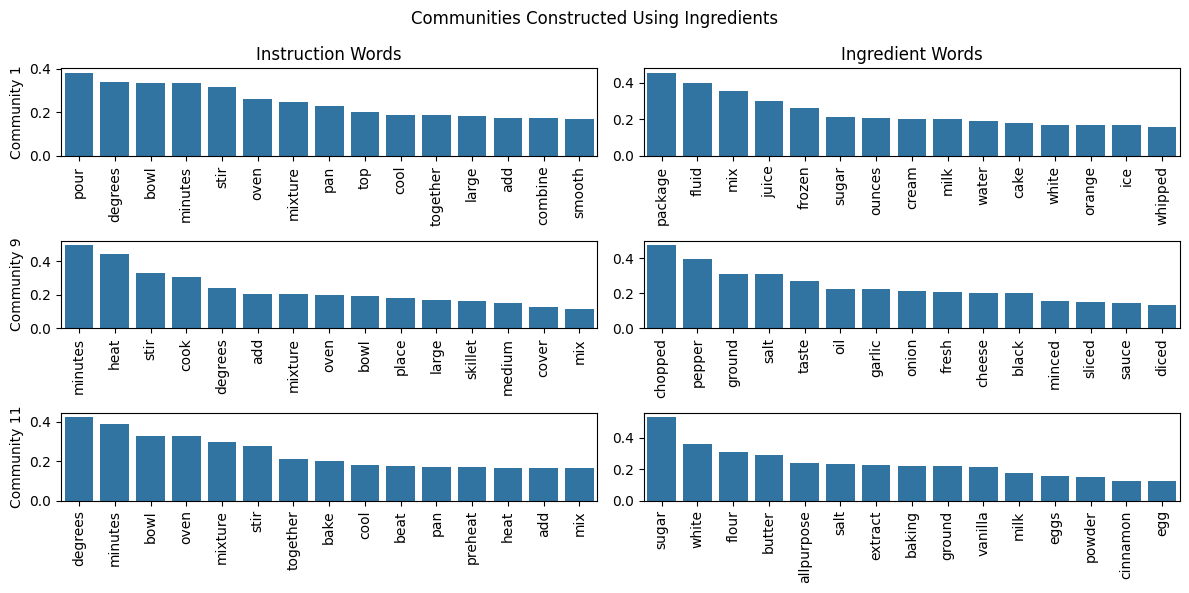

In [58]:
fig, ax = plt.subplots(3,2, figsize= (12,6))
com = 0
i = 0
for community in ingredient_communities:
    com = com + 1
    if len(community) < 100:
        continue
    community_data = datacleaning.data_for_nodes(community)
    ingredient_words = list(itertools.chain.from_iterable(community_data["ingredient_words"]))
    instruction_words = list(itertools.chain.from_iterable(community_data["instruction_words"]))
    instruction_freqs = pd.DataFrame(sorted(FreqDist(instruction_words).most_common(15), key=lambda x: x[1], reverse=True))
    ingredient_freqs = pd.DataFrame(sorted(FreqDist(ingredient_words).most_common(15), key=lambda x: x[1], reverse=True))
    sns.barplot(x=instruction_freqs[0], y=instruction_freqs[1]/np.linalg.norm(instruction_freqs[1]), ax= ax[i,0])
    ax[i,0].tick_params('x', labelrotation=90)
    ax[i,0].set_ylabel("Community " + str(com))
    ax[i,0].set_xlabel("")
    sns.barplot(x=ingredient_freqs[0], y=ingredient_freqs[1]/np.linalg.norm(ingredient_freqs[1]), ax= ax[i,1])
    ax[i,1].tick_params('x', labelrotation=90)
    ax[i,1].set_ylabel("")
    ax[i,1].set_xlabel("")
    i = i+1

ax[0,1].set_title("Ingredient Words")
ax[0,0].set_title("Instruction Words")

fig.suptitle("Communities Constructed Using Ingredients")
fig.tight_layout()
plt.show()

# Rotate x-axis labels for better readability


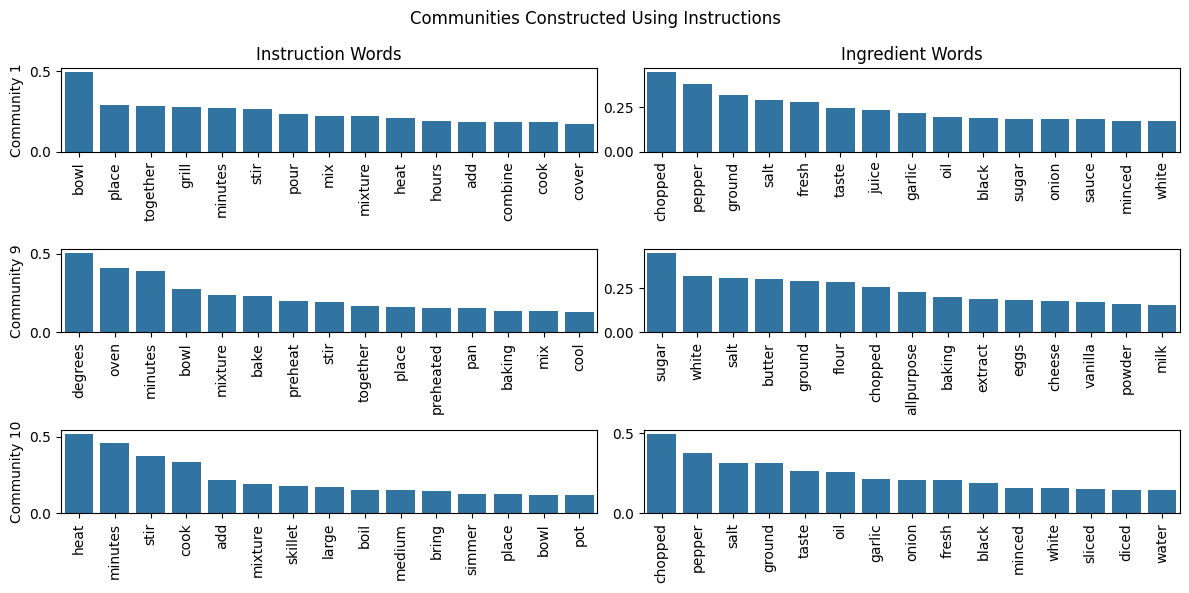

In [59]:
fig, ax = plt.subplots(3,2, figsize= (12,6))
com = 0
i = 0
for community in instruction_communities:
    com = com + 1
    if len(community) < 100:
        continue
    community_data = datacleaning.data_for_nodes(community)
    ingredient_words = list(itertools.chain.from_iterable(community_data["ingredient_words"]))
    instruction_words = list(itertools.chain.from_iterable(community_data["instruction_words"]))
    instruction_freqs = pd.DataFrame(sorted(FreqDist(instruction_words).most_common(15), key=lambda x: x[1], reverse=True))
    ingredient_freqs = pd.DataFrame(sorted(FreqDist(ingredient_words).most_common(15), key=lambda x: x[1], reverse=True))
    sns.barplot(x=instruction_freqs[0], y=instruction_freqs[1]/np.linalg.norm(instruction_freqs[1]), ax= ax[i,0])
    ax[i,0].tick_params('x', labelrotation=90)
    ax[i,0].set_ylabel("Community " + str(com))
    ax[i,0].set_xlabel("")
    sns.barplot(x=ingredient_freqs[0], y=ingredient_freqs[1]/np.linalg.norm(ingredient_freqs[1]), ax= ax[i,1])
    ax[i,1].tick_params('x', labelrotation=90)
    ax[i,1].set_ylabel("")
    ax[i,1].set_xlabel("")
    i = i+1
# v/np.linalg.norm(v)
ax[0,1].set_title("Ingredient Words")
ax[0,0].set_title("Instruction Words")
fig.suptitle("Communities Constructed Using Instructions")
fig.tight_layout()
plt.show()

In [60]:
ingredient_communities_sets = dict()

for i, community in enumerate(ingredient_communities):
    if len(community) > 100:
        ingredient_communities_sets["Community " + str(i+1)] = set(community)


instruction_communities_sets = dict()

for i, community in enumerate(instruction_communities):
    if len(community) > 100:
        instruction_communities_sets["Community " + str(i+1)] = set(community)

In [61]:
def sample_community(community: set):
    sample = random.sample(list(community), 5)
    sample = pd.Series(sample)
    return print(*np.ravel([data[data.Id == i].title for i in sample]),sep='\n')

def sample_communities(sets: dict):
    for community in sets:
        print(community)
        sample_community(sets[community])
        print("\n")

sample_communities(ingredient_communities_sets)

Community 1
10 Pound Cheesecake
Summer Brew
Fluffy Lemon Fruit Pie
Italian Cream Soda
Gourmet Gelly Shots: Green Melon Goodness


Community 9
Hearty Breakfast Specialty
Lauren's Cincinnati Chili
Chicken Oliver
Fresh Salsa I
Spicy Japanese Crab Noodle Salad


Community 11
Oreo® Mini Cheesecakes
Sherry Cobbler
Easy Glazed Carrots
Sweet Rice and Mango
Self-Rising Cornmeal




In [62]:
sample_communities(instruction_communities_sets)

Community 1
Mayo-Free Tuna Sandwich Filling
Mudslide Mousse Shots
Best Ever Kabob Marinade
Tomato and Mushroom Salad
Nicole's Mango Salsa


Community 9
Cheesy Eggplant Rollatini 
Spicy Harissa Chicken Kebabs
Chocolate Cakes with Liquid Centers
Easter Bunny 'Butt' Cake
Vegan Cupcakes


Community 10
Light Pot Stickers 
Pasta with Kielbasa and Sauerkraut
Pressure Cooker Chili
Dumplings
Warm Jeweled Barley Salad with Honey-Mustard Dressing




Text(0.5, 1.0, 'Overlap Coefficient for Detected Communities')

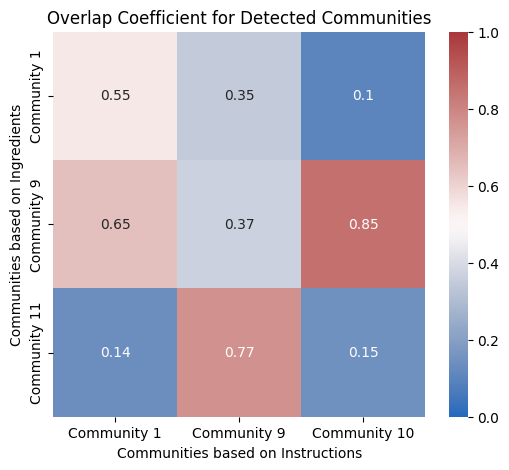

In [63]:
fig, ax = plt.subplots(1,1,figsize= (6,5))
A = {}
for icom in instruction_communities_sets:
    for jcom in ingredient_communities_sets:
        intersection = len(ingredient_communities_sets[jcom].intersection(instruction_communities_sets[icom]))
        minimum = min(len(ingredient_communities_sets[jcom]),len(instruction_communities_sets[icom]))
        A[icom] = A.get(icom, {})
        A[icom][jcom] = intersection/minimum


sns.heatmap(pd.DataFrame(A), annot=True, vmax=1, vmin=0, cmap="vlag", ax=ax)
ax.set_xlabel("Communities based on Instructions")
ax.set_ylabel("Communities based on Ingredients")
ax.set_title("Overlap Coefficient for Detected Communities")


In [64]:
i = 1
instruction_com = {}
for com in instruction_communities:
    instruction_com.update({recipe:i for recipe in com})
    i = i+1

instruction_com

i = 1
ingredient_com = {}
for com in ingredient_communities:
    ingredient_com.update({recipe:i for recipe in com})
    i = i+1

nx.set_node_attributes(instruction_graph_comparable, instruction_com, "instruction_com")
nx.set_node_attributes(instruction_graph_comparable, ingredient_com, "ingredient_com")

nx.set_node_attributes(ingredient_graph_comparable, instruction_com, "instruction_com")
nx.set_node_attributes(ingredient_graph_comparable, ingredient_com, "ingredient_com")

In [65]:
# fix titles
titles = data.set_index('Id')['title'].to_dict()

nx.set_node_attributes(ingredient_graph_comparable, titles, "title")
nx.set_node_attributes(instruction_graph_comparable, titles, "title")
nx.set_node_attributes(ingredient_graph, titles, "title")
nx.set_node_attributes(instruction_graph, titles, "title")

nx.write_gexf(instruction_graph, "recipe_instruction_small.gexf")
nx.write_gexf(ingredient_graph, "recipe_ingredient_small.gexf")

In [23]:
# nx.write_gexf(ingredient_graph_comparable, "ingredient_graph_comparable.gexf")

In [24]:
# nx.write_gexf(instruction_graph_comparable, "instruction_graph_comparable.gexf")

In [66]:
instruction_communities2 = nx.community.louvain_communities(instruction_graph, resolution=0.5,seed=2024)
ingredient_communities2 = nx.community.louvain_communities(ingredient_graph, resolution=0.5,seed=2024)

In [67]:
ingredient_communities_sets2 = dict()

for i, community in enumerate(ingredient_communities2):
    if len(community) > 100:
        ingredient_communities_sets2["Community " + str(i+1)] = set(community)


instruction_communities_sets2 = dict()

for i, community in enumerate(instruction_communities2):
    if len(community) > 100:
        instruction_communities_sets2["Community " + str(i+1)] = set(community)

In [69]:
sample_communities(ingredient_communities_sets2)

Community 50
Shredded Cereal Bread
Apple Pike
Fresh Blueberry Pie II
Gluten-Free Chocolate Cake with Coconut
LauHilLau Cookies


Community 151
Bacon Popcorn
Wild Rice Meatballs in Mushroom Sauce
Not My Grandma's Brussels Sprouts
Italian Pasta Salad I
Bromley Coleslaw


Community 181
Polka Dots
Inside Out Oreos®
Chocolate Picnic Cake
Snack Crackers
Coconut Cream Pie I


